10.WRITE A PROGRAM TO GENERATE CONFUSION MATRIXES FOR DIFFERENT MODELS AND ANALYZE THEIR PERFORMANCE.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM": SVC(kernel='linear', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
}

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


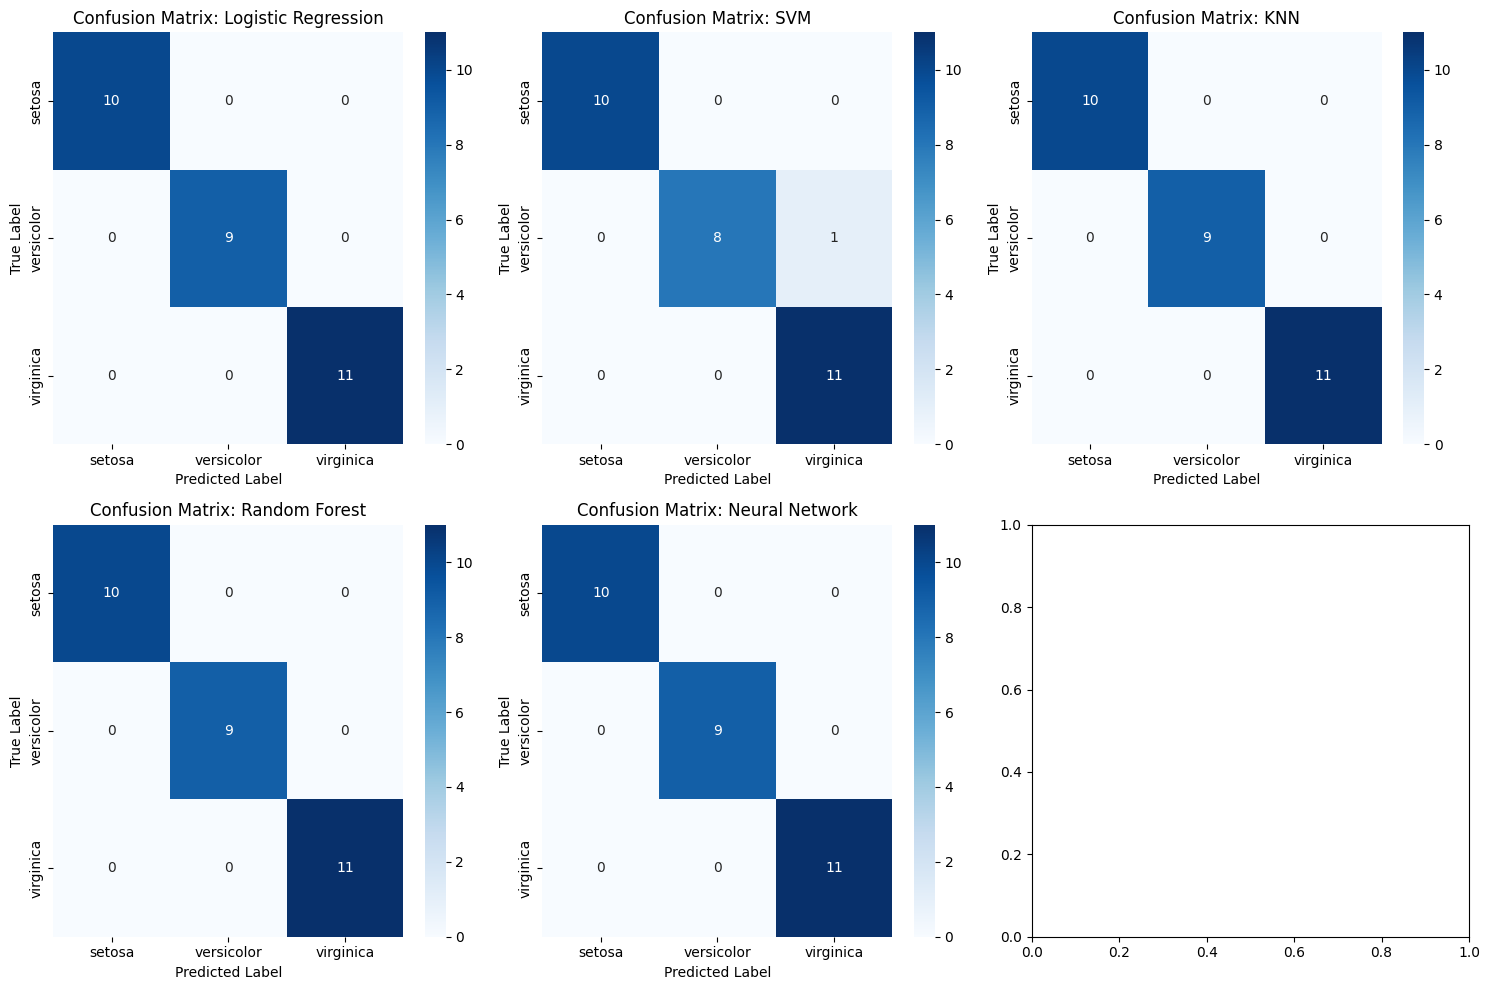

In [8]:
conf_matrices = {}
classification_reports = {}
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

    # Compute classification report
    classification_reports[name] = classification_report(y_test, y_pred, target_names=data.target_names)

    # Compute accuracy
    accuracies[name] = accuracy_score(y_test, y_pred)

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names, ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix: {name}")
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("True Label")

plt.tight_layout()
plt.show()

In [9]:
for name, report in classification_reports.items():
    print(f"\n🔹 Classification Report: {name} 🔹")
    print(report)

# Print model accuracies
print("\n🔹 Model Accuracies 🔹")
for name, acc in accuracies.items():
    print(f"{name}: {acc:.2%}")


🔹 Classification Report: Logistic Regression 🔹
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


🔹 Classification Report: SVM 🔹
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


🔹 Classification Report: KNN 🔹
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor     